In [20]:
import pandas as das

MercedesDf = das.read_csv('Mercedes.csv')
MercedesDf
MercedesDf.dtypes


y=MercedesDf['y']
MercedesDf.drop(columns='y',inplace=True)
MercedesDf.shape
y


MercedesDf.shape




(4209, 377)

In [21]:
cols_to_drop=[]

for col in MercedesDf.columns:
    if MercedesDf[col].nunique()==MercedesDf.shape[0] or MercedesDf[col].nunique()==1:
        cols_to_drop.append(col)
        
len(cols_to_drop)
MercedesDf.drop(columns=cols_to_drop,inplace=True)
MercedesDf.shape
MercedesDf.dtypes
MercedesDf.shape


(4209, 364)

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(MercedesDf,y,test_size=0.35,random_state=26)

            
X_train.dtypes
Y_train.dtypes

X_test.dtypes
# Y_test.dtypes


X0      object
X1      object
X2      object
X3      object
X4      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 364, dtype: object

In [23]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [24]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
le = LabelEncoderExt()

for col in X_train.columns:
     if(X_train[col].dtype==object):
            le.fit(X_train[col])
            X_train[col]=le.transform(X_train[col])
            X_test[col]=le.transform(X_test[col])
X_train
        

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1025,47,19,8,6,4,7,12,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2299,28,14,4,6,4,15,10,6,0,0,...,0,0,0,0,0,0,0,0,0,0
3875,28,20,16,5,4,25,7,7,0,0,...,1,0,0,0,0,0,0,0,0,0
2108,47,2,16,1,4,16,9,23,0,0,...,0,0,1,0,0,0,0,0,0,0
2127,46,2,26,3,4,16,9,19,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,41,2,8,3,4,21,7,9,0,0,...,1,0,0,0,0,0,0,0,0,0
2010,9,14,16,6,4,16,4,10,0,0,...,0,0,0,0,0,0,0,0,0,0
1126,37,14,16,6,4,2,9,18,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,37,23,9,3,4,16,4,13,0,1,...,1,0,0,0,0,0,0,0,0,0


In [26]:
#preproceesing
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

for col in X_train.columns:
    if(X_train[col].dtype!=object):
        X_train[col]=min_max.fit_transform(X_train[[col]])#fit_transform for Xtrain
        X_test[col]=min_max.transform(X_test[[col]])#transform for Xtrain
X_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1025,1.000000,0.72,0.166667,0.833333,1.0,0.230769,1.000000,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2299,0.586957,0.52,0.071429,0.833333,1.0,0.538462,0.818182,0.208333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3875,0.586957,0.76,0.357143,0.666667,1.0,0.923077,0.545455,0.250000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2108,1.000000,0.04,0.357143,0.000000,1.0,0.576923,0.727273,0.916667,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2127,0.978261,0.04,0.595238,0.333333,1.0,0.576923,0.727273,0.750000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,0.869565,0.04,0.166667,0.333333,1.0,0.769231,0.545455,0.333333,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,0.173913,0.52,0.357143,0.833333,1.0,0.576923,0.272727,0.375000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1126,0.782609,0.52,0.357143,0.833333,1.0,0.038462,0.727273,0.708333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,0.782609,0.88,0.190476,0.333333,1.0,0.576923,0.272727,0.500000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import HTML


vif=das.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

vif['Column name']=X_train.columns

vif


,VIF Factor,Column name
0,2.755792,X0
1,6.652787,X1
2,20.050518,X2
3,2.912247,X3
4,1.054282,X4
...,...,...
359,inf,X380
360,inf,X382
361,1.553885,X383
362,NaN,X384


# principal component analysis

Text(0, 0.5, 'explained_variance_ratio')

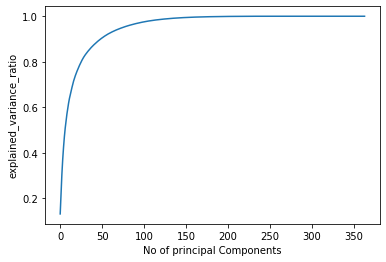

In [28]:
#principle component analysis
from sklearn.decomposition import PCA
import numpy as ny
import matplotlib.pyplot as lt #data visualisation library


pca_obj = PCA()
X_train_PCADF = das.DataFrame(pca_obj.fit_transform(X_train))
X_train_PCADF

pca_obj.explained_variance_ratio_
lt.plot(ny.cumsum(pca_obj.explained_variance_ratio_))
lt.xlabel('No of principal Components')
lt.ylabel('explained_variance_ratio')

# pca_obj.explained_variance_ratio_


In [33]:
pca_obj_1 = PCA(n_components = 50)
X_train_PCADF = das.DataFrame(pca_obj_1.fit_transform(X_train),columns=list(range(0,50)))
X_test_PCADF = das.DataFrame(pca_obj_1.transform(X_test))
X_train_PCADF
X_test_PCADF
X_train_PCADF.shape

(2735, 50)

In [29]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import HTML


vif=das.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X_train_PCADF.values,i) for i in range(X_train_PCADF.shape[1])]

vif['Column name']=X_train_PCADF.columns

vif


,VIF Factor,Column name
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
...,...,...
359,1.0,359
360,1.0,360
361,1.0,361
362,1.0,362


In [42]:
from sklearn.linear_model import LinearRegression,SGDRegressor

linearreg = LinearRegression()
linearreg.fit(X_train_PCADF,Y_train)
y_pred = linearreg.predict(X_test_PCADF)
comp_df = das.DataFrame({'Actual_values':Y_test,'Predicted':y_pred})
comp_df



,Actual_values,Predicted
2038,88.70,93.118125
490,118.18,106.858477
2735,158.23,111.231360
1075,95.77,93.976077
2983,139.16,109.312950
...,...,...
427,90.16,93.247260
1912,97.86,95.386859
1246,108.06,107.481001
4024,91.81,95.350752


In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,y_pred)

68.34940521877559

In [48]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)


0.5717575857168189